In [1]:
from Data.Preprocessing.preprocess import preprocess
import seaborn as sns
import matplotlib.pyplot as plt

from Streamlit.pages.immigration import COUNTRY_OF_CITIZENSHIP

X, y = preprocess()

/Users/gavinlynch04/PycharmProjects/GreenCardResearch/Data/Preprocessing/preprocess.py:18: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../Data/Data Sets/fullData.csv')
/Users/gavinlynch04/PycharmProjects/GreenCardResearch/Data/Preprocessing/preprocess.py:46: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['JOB_INFO_WORK_STATE'].replace({'MASSACHUSETTES': 'MASSACHUSETTS', 'MH': 'MARSHALL ISLANDS'}, inplace=True)
/Users/gavinlynch04/PycharmProjects/Gree

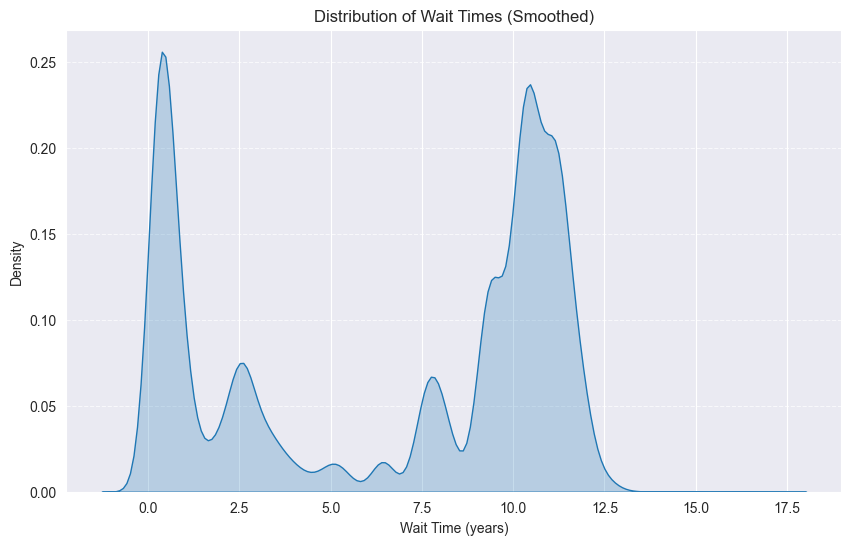

In [3]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=y, fill=True)
plt.title('Distribution of Wait Times (Smoothed)')
plt.xlabel('Wait Time (years)')
plt.ylabel('Density')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig("./Figures/KDEplot.svg", format="svg")
plt.show()

<Figure size 1000x600 with 0 Axes>

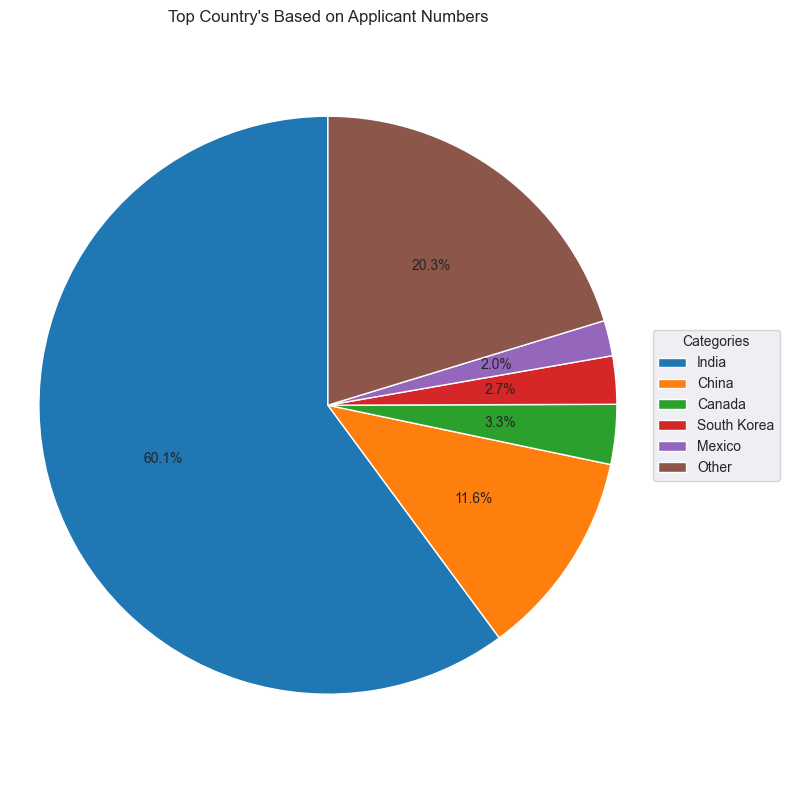

In [46]:
import pandas as pd
import re

plt.figure(figsize=(10, 6))
columns = [column for column in X.columns if "COUNTRY_OF_CITIZENSHIP" in column]
rename_mapping = {}
for original_col in columns:
    temp_name = original_col.replace("COUNTRY_OF_CITIZENSHIP_", "").lower()
    new_name = temp_name.title()
    rename_mapping[original_col] = new_name

country_df = X[columns].rename(columns=rename_mapping)
counts = [country_df[country].value_counts() for country in country_df.columns]
countryDict = {}
for count in counts:
    countryDict[count.index.name] = count[True]

title = "Top Country's Based on Applicant Numbers"
data_series = pd.Series(countryDict)
n = 5
sorted_series = data_series.sort_values(ascending=False)

if len(sorted_series) <= n:
    # If there are N or fewer items, plot them all
    labels = sorted_series.index.tolist()
    sizes = sorted_series.values.tolist()
else:
    # Separate top N and the rest
    top_n = sorted_series.head(n)
    other = sorted_series.iloc[n:]

    # Calculate the sum of the 'Other' category
    other_sum = other.sum()

    # Prepare labels and sizes for the plot
    labels = top_n.index.tolist() + ['Other']
    sizes = top_n.values.tolist() + [other_sum]

# --- Create the Pie Chart ---
fig, ax = plt.subplots(figsize=(8, 8)) # Adjust size as needed

# Use autopct to display percentages on slices
# Use startangle to rotate the start of the pie
wedges, texts, autotexts = ax.pie(
    sizes,
    autopct='%1.1f%%',
    startangle=90,
    # textprops=dict(color="w") # Optional: set text color if needed
)

# Add a legend (often better than labels directly on small slices)
ax.legend(
    wedges,
    labels,
    title="Categories",
    loc="center left",
    bbox_to_anchor=(1, 0, 0.5, 1) # Position legend outside chart
)

# Set aspect ratio to be equal so that pie is drawn as a circle.
ax.axis('equal')

plt.title(title)
plt.tight_layout() # Adjust layout to prevent labels overlapping title
plt.savefig("./Figures/pieplot.svg", format="svg")
plt.show()

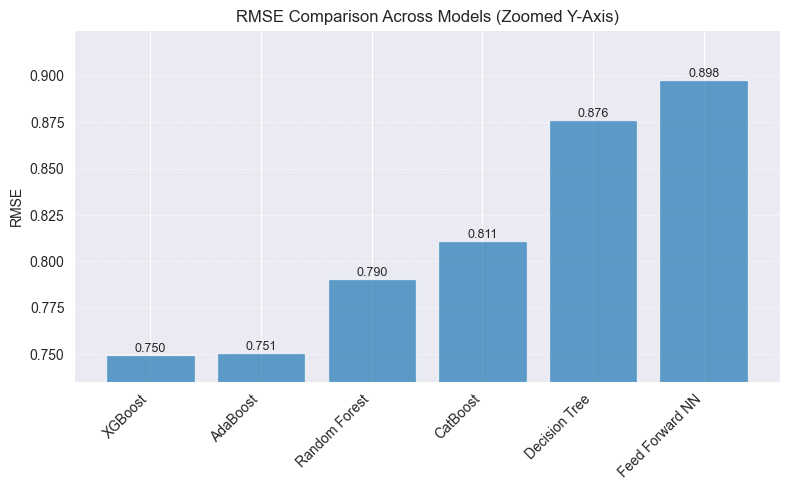

In [54]:
import matplotlib.pyplot as plt
import numpy as np

models = ['XGBoost', 'AdaBoost', 'Random Forest', 'CatBoost', 'Decision Tree', 'Feed Forward NN',]
rmse_values = [0.7498, 0.7509, 0.7904, 0.8108, 0.8764, 0.8976]
# Ensure models and rmse_values have the same length (6)

# --- Determine Y-axis limits ---
min_rmse = min(rmse_values)
max_rmse = max(rmse_values)
# Add some padding below the min and above the max
y_lower_limit = min_rmse * 0.98 # Start slightly below the minimum (e.g., 98% of min)
# Or set a fixed lower bound if preferred: y_lower_limit = 0.70
y_upper_limit = max_rmse * 1.03 # Go slightly above the maximum (e.g., 3% higher)
# Or set a fixed upper bound: y_upper_limit = 0.92

# --- Create Plot ---
fig, ax = plt.subplots(figsize=(8, 5)) # Adjust figsize as needed

# Bar positions
x_pos = np.arange(len(models))

# Create bars
bars = ax.bar(x_pos, rmse_values, align='center', alpha=0.7, capsize=5)

# --- Set Y-axis limits ---
# Apply the calculated limits
ax.set_ylim(bottom=y_lower_limit, top=y_upper_limit)
# Or use fixed limits: ax.set_ylim(0.70, 0.92)

# Add labels and title
ax.set_ylabel('RMSE')
ax.set_xticks(x_pos)
ax.set_xticklabels(models, rotation=45, ha="right") # Rotate labels if needed
ax.set_title('RMSE Comparison Across Models (Zoomed Y-Axis)')
ax.yaxis.grid(True, linestyle='--', alpha=0.6) # Add horizontal grid lines

# Optional: Add RMSE values on top of bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval,
             f'{yval:.3f}', # Format to 3 decimal places
             va='bottom', # Place text slightly above the bar
             ha='center',
             fontsize=9) # Adjust fontsize if needed

# Improve layout
plt.tight_layout()

# --- Save the Plot ---
# Use PDF or EPS for best quality in LaTeX
plt.savefig('rmse_comparison_zoomed.pdf', format='pdf', bbox_inches='tight')
# plt.savefig('rmse_comparison_zoomed.eps', format='eps', bbox_inches='tight')
# plt.savefig('rmse_comparison_zoomed.png', format='png', dpi=300, bbox_inches='tight')

plt.show() # Display the plot (optional)


/var/folders/g6/0zwbn3ys1sn1cfb8s33n2nf40000gn/T/ipykernel_96089/2620876418.py:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=plot_data.values, y=plot_data.index, palette="viridis", orient="h")


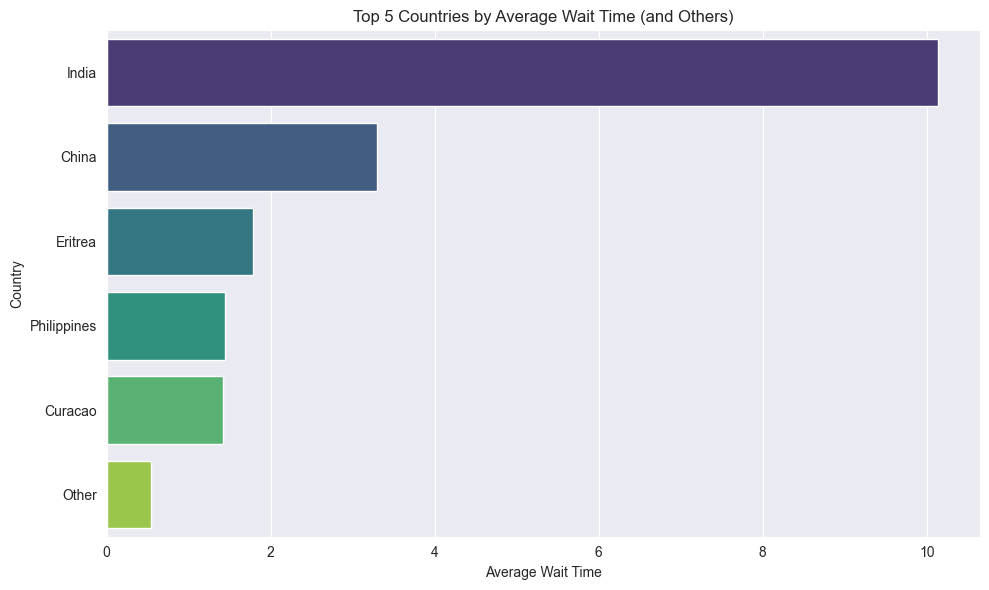

Average Wait Times:
India          10.142473
China           3.295971
Eritrea         1.791667
Philippines      1.44953
Curacao         1.416667
Other           0.546732
dtype: object


In [51]:

# 1. Identify and rename country columns (your provided code)
columns = [column for column in X.columns if "COUNTRY_OF_CITIZENSHIP" in column]
rename_mapping = {}
for original_col in columns:
    # Use regex to handle potential variations and ensure only country name remains
    match = re.search(r"COUNTRY_OF_CITIZENSHIP_(.*)", original_col)
    if match:
        temp_name = match.group(1).replace("_", " ").lower()
        new_name = temp_name.title()
        rename_mapping[original_col] = new_name

country_df = X[columns].rename(columns=rename_mapping)

# Ensure y is aligned with country_df (important if indices aren't standard)
y = y.loc[country_df.index]

# 2. Calculate average wait time for each country
# We can use matrix multiplication for efficiency:
# Sum of wait times for each country = country_df.T @ y
# Count of entries for each country = country_df.sum()
country_counts = country_df.sum()
# Avoid division by zero for countries with no entries in the sample
valid_countries = country_counts[country_counts > 0].index
country_sums = country_df[valid_countries].T.dot(y)
country_averages = country_sums / country_counts[valid_countries]

# Sort countries by average wait time (descending)
country_averages_sorted = country_averages.sort_values(ascending=False)

# 3. Get Top 5 and calculate "Other" average
top_n = 5
if len(country_averages_sorted) > top_n:
    top_5_countries = country_averages_sorted.head(top_n)
    other_countries = country_averages_sorted.index[top_n:]

    # Find the rows corresponding to "other" countries
    is_other_country = country_df[other_countries].sum(axis=1) >= 1
    # Calculate the average wait time for these "other" rows
    other_average = y[is_other_country].mean()

    # Create the final series for plotting
    plot_data = pd.concat(
        [top_5_countries, pd.Series([other_average], index=["Other"])]
    )
    plot_title = f"Top {top_n} Countries by Average Wait Time (and Others)"
else:
    # Handle cases with 5 or fewer countries
    plot_data = country_averages_sorted
    plot_title = "Average Wait Time by Country"


# 4. Create the horizontal bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=plot_data.values, y=plot_data.index, palette="viridis", orient="h")

plt.xlabel("Average Wait Time")
plt.ylabel("Country")
plt.title(plot_title)
plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.savefig('avgWaits.pdf', format='pdf', bbox_inches='tight')
plt.show()

print("Average Wait Times:")
print(plot_data)